## Exercício de Fixação de Conceitos (EFC) 3 – Filtros Analógicos
## Gustavo Nascimento Soares - 217530

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from calc_aux import chebyshev, butterworth
from plot_aux import clean_layout, wc_vline, plot_custom_HY

In [2]:
size = 1000
figsize = (16, 4)
wc = 5
w = np.linspace(0, 20, size)

### a)
----

In [3]:
e = .2
n = list(range(1, 6))
Hc_abs = list(map(lambda x: chebyshev(w, wc, x, e), n))

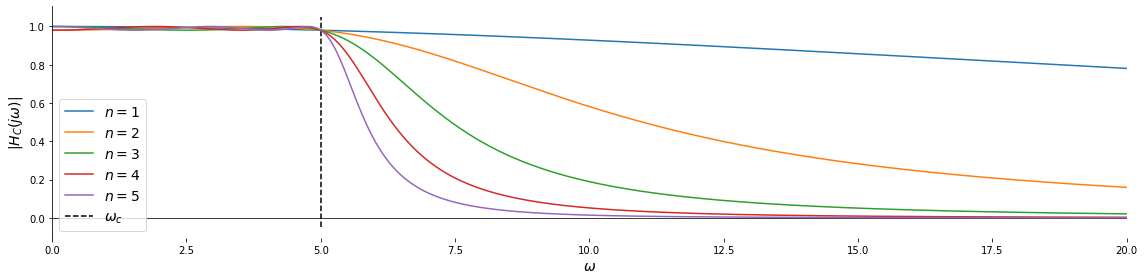

In [4]:
fig, ax = plt.subplots(figsize=figsize)

for i, H in zip(n, Hc_abs):
    ax.plot(w, H, label=f'$n = {i}$')
wc_vline(wc, ax, 'k')
    
ax.set_xlabel('$\omega$', fontsize=14)
ax.set_ylabel('$|H_C(j\omega)|$', fontsize=14)
clean_layout(fig, [ax])
ax.legend(fontsize=14)

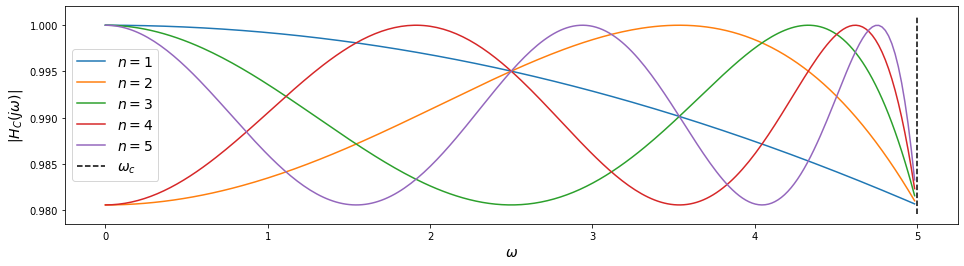

In [5]:
fig, ax = plt.subplots(figsize=figsize)

for i, H in zip(n, Hc_abs):
    ax.plot(w[:size//4], H[:size//4], label=f'$n = {i}$')
wc_vline(wc, ax, 'k')
    
ax.set_xlabel('$\omega$', fontsize=14)
ax.set_ylabel('$|H_C(j\omega)|$', fontsize=14)
ax.legend(fontsize=14)

Com o aumento de $n$, a ondulação residual aumenta a oscilação na banda passante, a banda de transição diminui. O decaimento de $|H(j\omega)|$ começa próximo da frequência de corte.

### b)
----

In [6]:
e = list(map(lambda x: x/10, range(1, 10, 2)))
n = 3
Hc_abs = list(map(lambda x: chebyshev(w, wc, n, x), e))

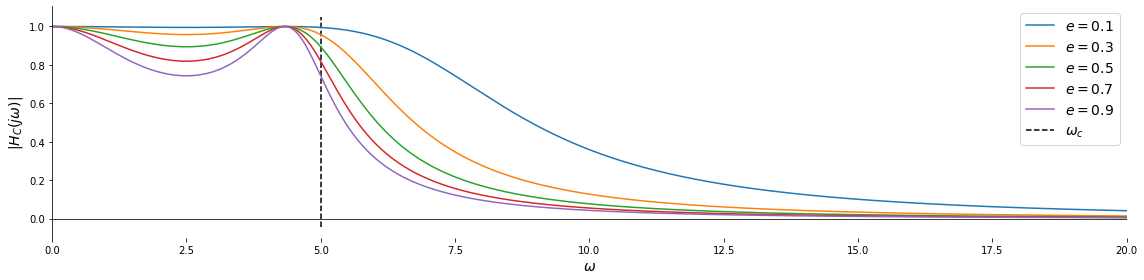

In [7]:
fig, ax = plt.subplots(figsize=figsize)

for i, H in zip(e, Hc_abs):
    ax.plot(w, H, label=f'$e = {i}$')
wc_vline(wc, ax, 'k')

ax.set_xlabel('$\omega$', fontsize=14)
ax.set_ylabel('$|H_C(j\omega)|$', fontsize=14)
clean_layout(fig, [ax])
ax.legend(fontsize=14)

Com o aumento de $\epsilon$, a distorção na banda passante aumenta e a banda de transição diminui.

### c)
----

In [8]:
n = list(range(1, 6))
Hb_abs = list(map(lambda x: butterworth(w, wc, x), n))

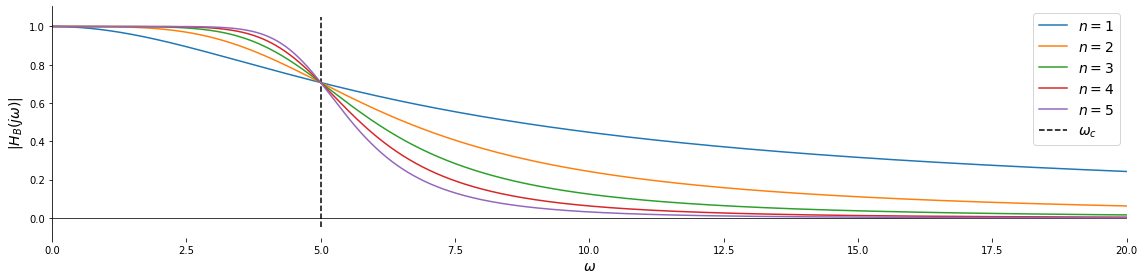

In [9]:
fig, ax = plt.subplots(figsize=figsize)

for i, H in zip(n, Hb_abs):
    ax.plot(w, H, label=f'$n = {i}$')
wc_vline(wc, ax, 'k')

ax.set_xlabel('$\omega$', fontsize=14)
ax.set_ylabel('$|H_B(j\omega)|$', fontsize=14)
clean_layout(fig, [ax])
ax.legend(fontsize=14)

Com o aumento de $n$, a banda de transição diminui, se aproximando do filtro ideal. Não há oscilação residual, mas o decaimento de $|H(j\omega)|$ começa bem antes da frequência de corte para valores baixos de $n$.

### d)
----
$$X(j\omega) = \int_{-\infty}^{+\infty} x(t)e^{-j\omega t}dt = \frac{2sin(\omega \frac{\tau}{2})}{\omega}$$

$$X(j0) = \lim_{\omega \to 0} X(j\omega) = \tau$$

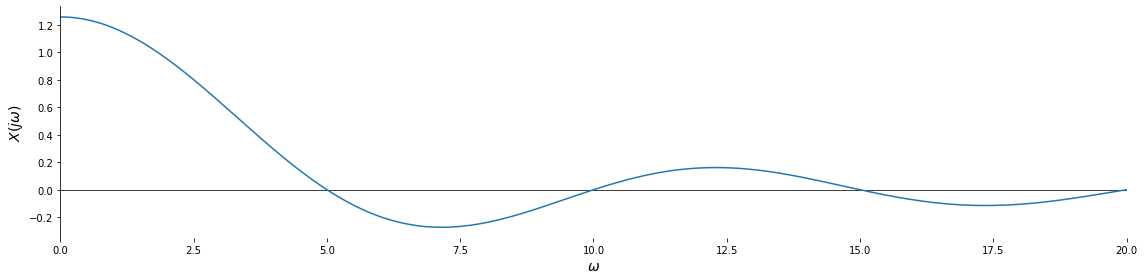

In [10]:
tau = 2*np.pi/wc
w = np.linspace(0, 20, size)

Xjw = np.zeros(w.size)
Xjw[0] = tau
Xjw[1:] = 2*np.sin(w[1:]*tau/2)/w[1:]

fig, ax = plt.subplots(figsize=figsize)

ax.plot(w, Xjw)

ax.set_xlabel('$\omega$', fontsize=14)
ax.set_ylabel('$X(j\omega)$', fontsize=14)

clean_layout(fig, [ax])

$$X(j\omega) = 0$$
$$\therefore sin(\omega \frac{\tau}{2}) = 0$$
$$\therefore \omega = k\frac{2\pi}{\tau} = k\omega_c, k \in \mathbb{Z}^*$$

Logo, $X(j\omega) = 0$ nos múltiplos da frequência de corte, com exceção de $\omega = 0$.

### e)
---

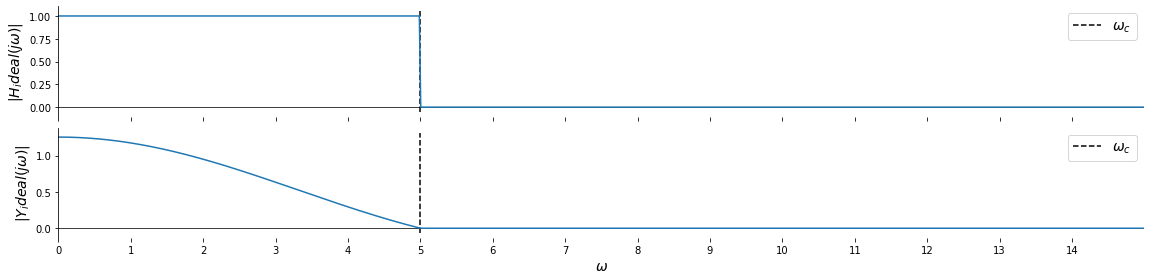

In [11]:
Hideal = np.zeros(size)
Hideal[np.abs(w) <= wc] = 1

Yjw = Hideal*Xjw

plot_custom_HY(w[:3*size//4], wc, Hideal[:3*size//4], Yjw[:3*size//4], 'ideal', figsize)

### f)
---

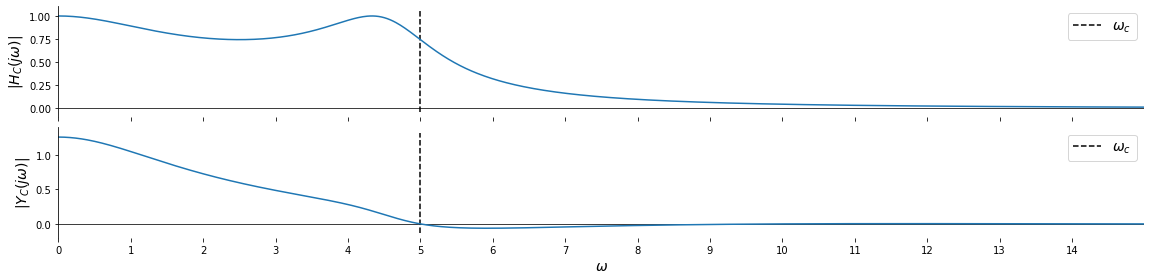

In [12]:
Hc_abs = chebyshev(w, wc, 3, .9)

Ycjw = Hc_abs*Xjw

plot_custom_HY(w[:3*size//4], wc, Hc_abs[:3*size//4], Ycjw[:3*size//4], 'C', figsize)

### g)
---

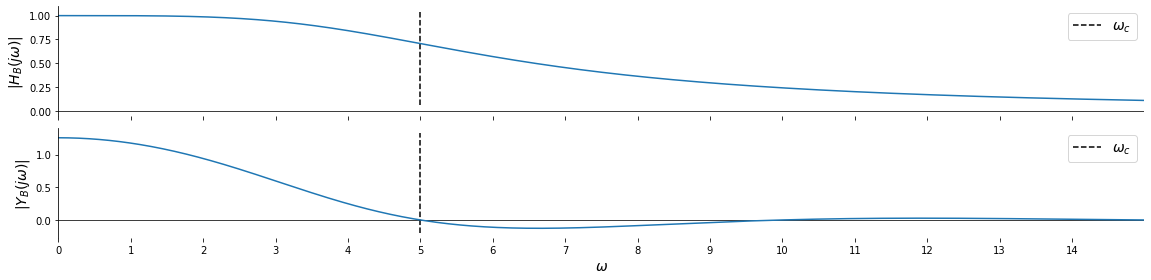

In [13]:
Hb_abs = butterworth(w, wc, 2)

Ybjw = Hb_abs*Xjw

plot_custom_HY(w[:3*size//4], wc, Hb_abs[:3*size//4], Ybjw[:3*size//4], 'B', figsize)

### h)
---

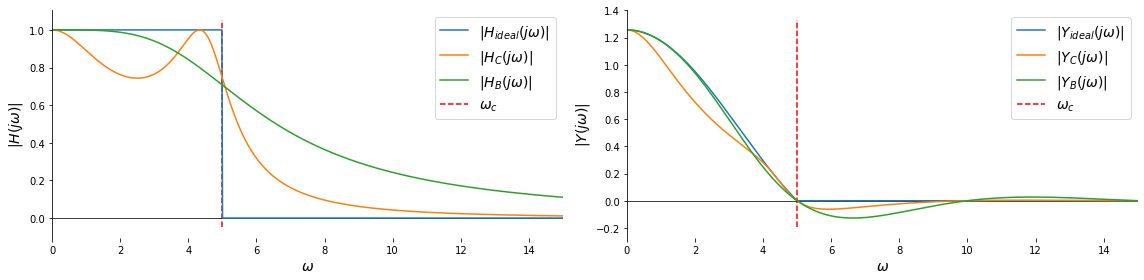

In [14]:
fig, axs = plt.subplots(1, 2, figsize=figsize)

ax = axs[0]
ax.plot(w[:3*size//4], Hideal[:3*size//4], label='$|H_{ideal}(j\omega)|$')
ax.plot(w[:3*size//4], Hc_abs[:3*size//4], label='$|H_{C}(j\omega)|$')
ax.plot(w[:3*size//4], Hb_abs[:3*size//4], label='$|H_{B}(j\omega)|$')
ax.set_ylabel('$|H(j\omega)|$', fontsize=14)

ax = axs[1]
ax.plot(w[:3*size//4], Yjw[:3*size//4], label='$|Y_{ideal}(j\omega)|$')
ax.plot(w[:3*size//4], Ycjw[:3*size//4], label='$|Y_{C}(j\omega)|$')
ax.plot(w[:3*size//4], Ybjw[:3*size//4], label='$|Y_{B}(j\omega)|$')
ax.set_ylabel('$|Y(j\omega)|$', fontsize=14)

for ax in axs:
    wc_vline(wc, ax, 'r')
    ax.set_xlabel('$\omega$', fontsize=14)
    ax.legend(fontsize=14)
clean_layout(fig, axs)

Esse filtro de Chebyshev apresenta um perfil bem diferente do filtro ideal abaixo da frequência de corte $\omega_c$. É de se esperar que isso cause bastante distorção no sinal de saída quando comparado com a saída ideal. Entretanto, a sua banda de transição é relativamente curta, principalmente se comparado com a banda do filtro de Butterworth trabalhado, que atenua o sinal mesmo em frequências abaixo de $\omega_c$ ao mesmo tempo que mantém frequências bem acima de $\omega_c$ no sinal de saída.


$|Y_{ideal}(j\omega)|$ é um recorte perfeito de $X(j\omega)$ até a frequência de corte e é nulo além desse valor. O efeito da distorção de $|H_C(j\omega)|$ pode ser observado em $|Y_C(j\omega)|$, que se distancia bastante do ideal em torno do intervalo $1 \leq \omega \leq 4$. Já as frequências acima de $\omega_c$ são bem atenuadas. O efeito de atenuação em frequências abaixo de $\omega_c$ de $|H_B(j\omega)|$ não é tão perceptível porque a amplitude de $X(j\omega)$ diminui no intervalo $0 \leq \omega \leq 5$, logo $|Y_B(j\omega)|$ é bem próximo do ideal nesse intervalo. Além disso, as frequências acima de $\omega_c$ têm atenuação muito modesta, sendo quase que completamente eliminadas apenas quando acima de $2\omega_c$.